#Library

In [ ]:
!pip install opendatasets --quiet
!pip install split-folders --quiet

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import Sequence

import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import splitfolders
import pandas as pd
import os

import shutil
from PIL import Image

#Drive connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Open File

In [ ]:
with open('/content/drive/MyDrive/Facerecognition/list_attribute.txt', 'r') as f:
  f.read()
# open the sample file used
file = open('/content/drive/MyDrive/Facerecognition/list_attribute.txt')

# read the content of the file opened
content = file.readlines()


# print first 3 lines of file
print("first three lines")
print(content[0:3])

first three lines
['202599\n', '5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young \n', '000001.jpg -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1\n']


In [ ]:
#Analisis kesesuaian Header dengan Value
print("Header")
print(content[1].split())
print("value baris pertama")
print(content[2].split())

Header
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
value baris pertama
['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1']


In [ ]:
content_list = []

for line in content[1:]:
  content_list.append(line.split())

print(content_list[0:5])

[['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'], ['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1'], ['000002.jpg', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1',

In [ ]:
content_list[0].insert(0, "file_name")
print(content_list[0])

['file_name', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


# Ekstrak

In [ ]:
#Mengekstrak atribut file_name dan Male untuk kebutuhan klasifikasi
content_list[0].index('Male')

21

In [ ]:
# Extract the relevant information (filename and Male attribute) into lists
filenames = []
male_attributes = []

for part in content_list[1:]:
    filename = part[0]
    male_attribute = part[21]  # 'Male' is the 21st attribute based on the given structure

    filenames.append(filename)
    male_attributes.append(male_attribute)

# Create a DataFrame
df = pd.DataFrame({
    'file_name': filenames,
    'male': male_attributes
})

# Display the first few rows of the dataframe to verify
df.head()

,file_name,male
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   file_name  202599 non-null  object
 1   male       202599 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [ ]:
images_path = '/content/drive/MyDrive/Facerecognition/Images'


In [ ]:
import glob
print("total images in folder: "+str(len(glob.glob('/content/drive/MyDrive/Facerecognition/Images*'))))
#print(len(glob.glob(images_path+"/*.jpg"))

total images in folder: 1


In [ ]:
print((glob.glob(images_path+"/*")[0:5]))


['/content/drive/MyDrive/Facerecognition/Images/150511.jpg', '/content/drive/MyDrive/Facerecognition/Images/120938.jpg', '/content/drive/MyDrive/Facerecognition/Images/038438.jpg', '/content/drive/MyDrive/Facerecognition/Images/072620.jpg', '/content/drive/MyDrive/Facerecognition/Images/085021.jpg']


In [ ]:
existing_file_name =pd.Series((glob.glob(images_path+"/*.jpg")))


In [ ]:
existing_file_name = existing_file_name.str.replace(images_path+"/", "", regex=False)


In [ ]:
existing_file_name


0       150511.jpg
1       120938.jpg
2       038438.jpg
3       072620.jpg
4       085021.jpg
           ...    
5022    035377.jpg
5023    034817.jpg
5024    041032.jpg
5025    103602.jpg
5026    104976.jpg
Length: 5027, dtype: object

In [ ]:
clean_df = df[df['file_name'].isin(existing_file_name)]
clean_df.sort_index()

,file_name,male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,-1
...,...,...
202319,202320.jpg,-1
202339,202340.jpg,-1
202346,202347.jpg,-1
202356,202357.jpg,-1


In [ ]:
clean_df['gender'] = clean_df['male'].map({'1': 'Male', '-1':'Female'})


<ipython-input-19-abf8fe6bc78f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['gender'] = clean_df['male'].map({'1': 'Male', '-1':'Female'})


In [ ]:
clean_df.to_csv('clean_attribute.csv',index=False)


In [ ]:
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 50 to 202565
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  5000 non-null   object
 1   male       5000 non-null   object
 2   gender     5000 non-null   object
dtypes: object(3)
memory usage: 156.2+ KB


In [ ]:
male_df = clean_df[clean_df['gender']=='Male']
male_df

,file_name,male,gender
50,000051.jpg,1,Male
51,000052.jpg,1,Male
64,000065.jpg,1,Male
165,000166.jpg,1,Male
281,000282.jpg,1,Male
...,...,...,...
201430,201431.jpg,1,Male
201603,201604.jpg,1,Male
201955,201956.jpg,1,Male
202275,202276.jpg,1,Male


In [ ]:
female_df = clean_df[clean_df['gender']=='Female']
female_df

,file_name,male,gender
197,000198.jpg,-1,Female
200,000201.jpg,-1,Female
239,000240.jpg,-1,Female
524,000525.jpg,-1,Female
652,000653.jpg,-1,Female
...,...,...,...
202252,202253.jpg,-1,Female
202319,202320.jpg,-1,Female
202339,202340.jpg,-1,Female
202346,202347.jpg,-1,Female


In [ ]:
female_df.sample()['file_name'].iloc[0]


'197502.jpg'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

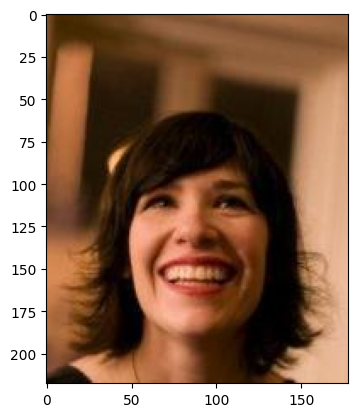

In [ ]:
img = mpimg.imread(images_path+"/"+female_df.sample()['file_name'].iloc[0])
imgplot = plt.imshow(img)
plt.show()

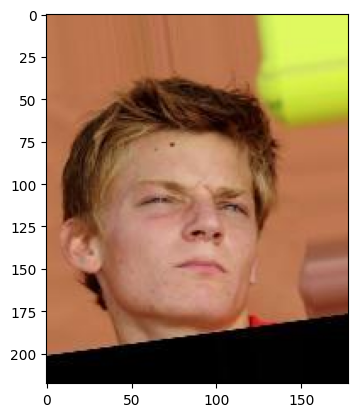

In [ ]:
img = mpimg.imread(images_path+"/"+male_df.sample()['file_name'].iloc[0])
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Load the dataset
dataset_path = '/content/clean_attribute.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(dataset_path)

In [ ]:
# Menampilkan informasi singkat tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  5000 non-null   object
 1   male       5000 non-null   int64 
 2   gender     5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None


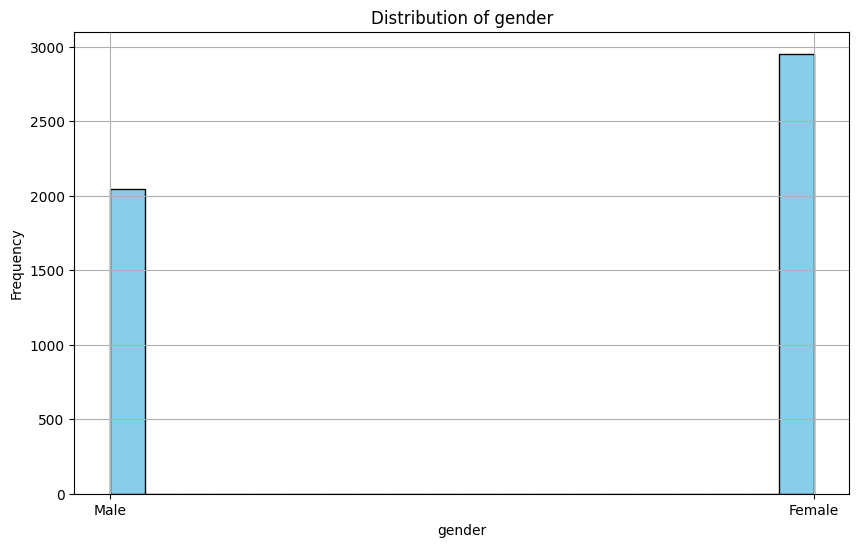

In [ ]:
# Visualisasi distribusi data menggunakan histogram untuk kolom tertentu
def plot_histogram(column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_histogram('gender')


# Split

In [ ]:
from sklearn.model_selection import train_test_split

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('/content/clean_attribute.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.2, random_state=42)

#Model

In [ ]:
from tensorflow.keras.applications import ResNetRS152

def create_pre_trained():
  pre_trained_model =ResNetRS152(input_shape = (224, 224, 3),
                                  include_top = False,
                                  weights = 'imagenet',
                                  pooling ='max',
                                  classes = 2)

  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained()

340541616/340541616 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

num_classes = 2

def create_final_model(pre_trained_model, num_classes):
  x = layers.Flatten()(pre_trained_model.output)
  x = layers.Dense(216, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1, activation='sigmoid')(x)

  model = Model(inputs=pre_trained_model.input, outputs=x)

  return model

In [ ]:
model = create_final_model(pre_trained_model, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)          0         ['normalization[0][0]']   

#Normalization

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.2, 0.8),
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches from the training DataFrame
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/drive/MyDrive/Facerecognition/Images/',  # Specify the directory where training images are located
    x_col='file_name',  # Column containing filenames
    y_col='gender',  # Column containing labels
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',  # Assuming binary classification
    seed=42
)

# Flow validation images in batches from the validation DataFrame
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='/content/drive/MyDrive/Facerecognition/Images/',  # Specify the directory where validation images are located
    x_col='file_name',  # Column containing filenames
    y_col='gender',  # Column containing labels
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',  # Assuming binary classification
    seed=42
)

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


#Compile and Train the model

In [ ]:
model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
                metrics=['accuracy'])

In [ ]:
EPOCHS = 20

history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      batch_size = 20,
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),
      verbose=2)

Epoch 1/20
200/200 - 217s - loss: 0.7528 - accuracy: 0.5742 - val_loss: 0.6888 - val_accuracy: 0.5540 - 217s/epoch - 1s/step
Epoch 2/20
200/200 - 91s - loss: 0.6751 - accuracy: 0.5928 - val_loss: 0.6855 - val_accuracy: 0.5740 - 91s/epoch - 457ms/step
Epoch 3/20
200/200 - 92s - loss: 0.6752 - accuracy: 0.5957 - val_loss: 0.6679 - val_accuracy: 0.5920 - 92s/epoch - 460ms/step
Epoch 4/20
200/200 - 90s - loss: 0.6698 - accuracy: 0.5935 - val_loss: 0.6751 - val_accuracy: 0.5980 - 90s/epoch - 450ms/step
Epoch 5/20
200/200 - 90s - loss: 0.6656 - accuracy: 0.6160 - val_loss: 0.6963 - val_accuracy: 0.5390 - 90s/epoch - 449ms/step
Epoch 6/20
200/200 - 94s - loss: 0.6682 - accuracy: 0.6058 - val_loss: 0.6367 - val_accuracy: 0.6550 - 94s/epoch - 468ms/step
Epoch 7/20
200/200 - 92s - loss: 0.6638 - accuracy: 0.6043 - val_loss: 0.6399 - val_accuracy: 0.6440 - 92s/epoch - 462ms/step
Epoch 8/20
200/200 - 91s - loss: 0.6626 - accuracy: 0.6137 - val_loss: 0.6303 - val_accuracy: 0.6640 - 91s/epoch - 457m

# Check train and val performance

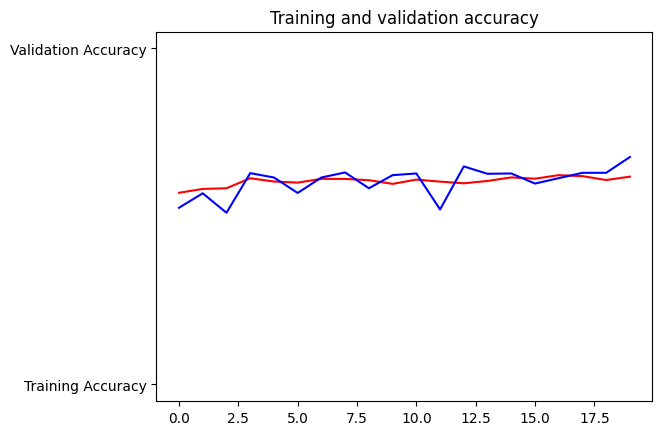

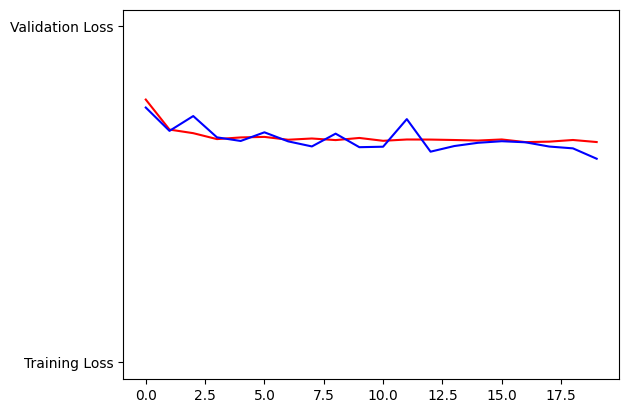

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

#Testing data

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_FileNames,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)

loss, accuracy = model.evaluate(test_generator)

print("Test accuracy:", accuracy)

NameError: name 'test_FileNames' is not defined

#Make F1 table and Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming model is already trained and stored in variable 'model'

# Step 1: Predict on validation data
Y_pred = model.predict(validation_generator)

# Convert predictions to binary values
Y_pred_binary = np.round(Y_pred)

# Step 2: Compute confusion matrix
conf_matrix = confusion_matrix(validation_generator.classes, Y_pred_binary)

# Step 3: Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


50/50 [==============================] - 15s 187ms/step
Confusion Matrix:
[[123 473]
 [ 80 324]]


#Save model

In [ ]:
#Save to H5 format
model.save("model_resnet152_1e-3.h5")

In [ ]:
#Save to TFLite format
saved_model = tf.keras.models.load_model("model_resnet152_1e-3.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(saved_model)

model_convert = converter.convert()
file_convert = open ("model_resnet152_1e-3.tflite", "wb")
file_convert.write(model_convert)

In [ ]:
#Save to tfjs format
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

saved_model = tf.keras.models.load_model("model_resnet152_1e-3.h5")

tfjs.converters.save_keras_model(saved_model, '/content')